# Homework (15 pts) - Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
# data from Jonathan Pillow's lab: https://github.com/pillowlab/GLMspiketraintutorial
stimulus = np.load('retinal_ganglion_stimulus.npy')
spikes = np.load('retinal_ganglion_spikes.npy')

stimulus.shape, spikes.shape

((20000,), (20000,))

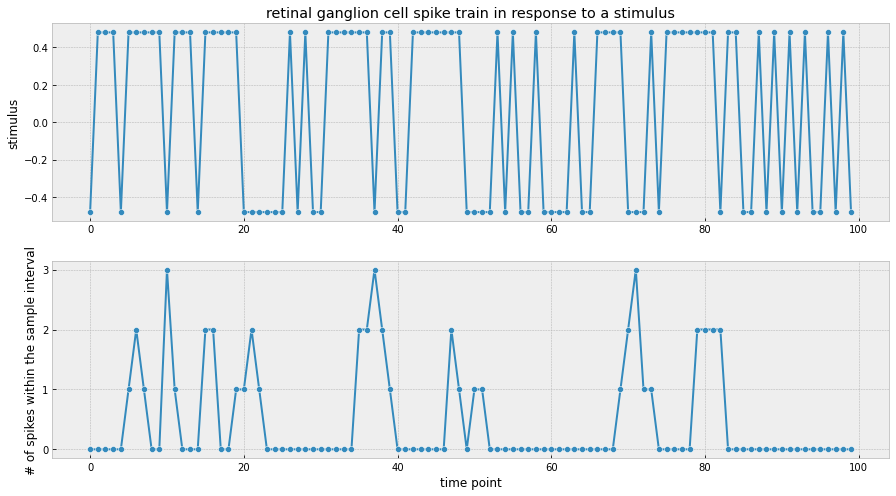

In [3]:
# retinal ganglion stimulus and spike data
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.plot(stimulus[:100], 'o-')
plt.ylabel('stimulus')
plt.title('retinal ganglion cell spike train in response to a stimulus')
plt.subplot(212)
plt.plot(spikes[:100], 'o-')
plt.yticks(range(4))
plt.ylabel('# of spikes within the sample interval')
plt.xlabel('time point');

---
1. (6 pts) Consider a Poisson GLM model that predicts the number of spikes within each time interval based on the stimulus during a window period preceding and inluding the current time point (just as we did in class). See the function `stimulus_to_X` below for generating the matrix of prediction windows for each time point (each row of X) where the columns of X correspond to the window size used for prediction (i.e., the number of predictors). Try a bunch of different window lengths to see which is best (see `window_lengths` below). For each window length, use 10-fold cross validation to determine the optimal regularization strengths $\alpha$ (try values of $\alpha$ in `alphas` below). For each value of window length and alpha, store the mean and standard deviation for the mean squared error across validation folds in the variables `cv_mse_mean` and `cv_mse_std`.

In [4]:
def stimulus_to_X(stimulus, window_length):
    T = len(stimulus)
    X = np.zeros((T, window_length))
    for t in range(T):
        if t < window_length-1:
            X[t,-t-1:] = stimulus[:t+1]  # last t columns of row t
        else:
            X[t,:] = stimulus[t-window_length+1:t+1]  # full row t
    return X

In [5]:
window_lengths = np.arange(10, 31, 5)
alphas = np.logspace(-4, 1, 25)

In [ ]:
# allocate memory for storing cross validated mean squared errors
cv_mse_mean = ...
cv_mse_std = ...

In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV

# Predictors and response data.
# X will be different for each window length.
y = spikes

# randomly shuffled indices for each response
ind = np.arange(len(y))
np.random.shuffle(ind)

# for each window length...
for i, w in enumerate(window_lengths):
    print(f'Window length = {w}...')
    
    # get predictors matrix X based on window length
    X = ...
    
    # Perform 10-fold cross validation on a Poisson GLM model
    # for each regularization strength alpha.
    # Use mean squared error to score.
    ...
    
    # Store the mean and standard deviation of the mean squared error
    # across the 10 validation folds.
    cv_mse_mean[i,:] = ...
    cv_mse_std[i,:] = ...
    
print('Done')

---
2. (3 pts) Based on the cross-validated mean squared errors (MSEs) you computed above, find the window length and regularization strength $\alpha$ with the lowest MSE.

---
3. (3 pts) For the best window length, plot the MSE vs. $\alpha$. Similarly, for the best $\alpha$, plot the MSE vs. window length. In both cases, plot the mean cross-validated MSE and indicate the envelope within a standard deviation with a shaded region.

---
4. (3 pts) What does the above plot tell you about the dependence of your model on the window length?